# Purpose of Dataset Selected

The purpose of our project is to determine the reliability of an airline based on their prior on-time statistics spanning data for one year.

The following dataset is downloaded from the bureau of transportation website and contains metrics for domestic flights by major carriers.  It contains on-time arrival data such as departure and arrival delays, origin and destination airports, flight numbers, scheduled and actual departure and arrival times, cancelled or diverted flights, taxi-out and taxi-in times, air time, and non-stop distance.

For the purpose of this study, we downloaded data spanning March 2016 to February 2017.  There are 6,032,365 total records and 98 attributes in total.

# Business Understanding

In order to gauge whether the flight is reliable, we will use the following dataset features:  Departure delay, Arrival Delay, 
Cancelled, and Diverted.  

A reliable airline is defined as one where, if the flight is delayed/diverted then, departure delay is 
less than or equal to 60 minutes and arrival delay is less than or equal to 30 minutes.  In addition, the flight cancellation
rate should be <=30% for a given month.  

The data in the present dataset includes features such as weather delay, CarrierDelay,NASDelay, SecurityDelay and 
LateAircraftDelay timings in minutes.  One potential approach to predict the future reliability of the
flight could be to do cluster analysis for each airline by month based on the above delay conditions and predict future delays.
We can do stratified cross validation there forth and do Precision-Recall curve analysis to classify "positive" class outcomes.

# Data Meaning Type

In [19]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [20]:
pd.read_clipboard(sep='\t')

Field Name  \
0   Year                 
1   Quarter              
2   Month                
3   DayofMonth           
4   DayOfWeek            
5   FlightDate           
6   UniqueCarrier        
7   AirlineID            
8   Carrier              
9   TailNum              
10  FlightNum            
11  OriginAirportID      
12  OriginAirportSeqID   
13  OriginCityMarketID   
14  Origin               
15  OriginCityName       
16  OriginState          
17  OriginStateFips      
18  OriginStateName      
19  OriginWac            
20  DestAirportID        
21  DestAirportSeqID     
22  DestCityMarketID     
23  Dest                 
24  DestCityName         
25  DestState            
26  DestStateFips        
27  DestStateName        
28  DestWac              
29  CRSDepTime           
..         ...           
68  DivDistance          
69  Div1Airport          
70  Div1AirportID        
71  Div1AirportSeqID     
72  Div1WheelsOn         
73  Div1TotalGTime       
74  Div1LongestGTime     
75  Div1WheelsOff        
76  Div1TailNum          
77  Div2Airport          
78  Div2AirportID        
79  Div2AirportSeqID     
80  Div2WheelsOn         
81  Div2TotalGTime       
82  Div2LongestGTime     
83  Div2WheelsOff        
84  Div2TailNum          
85  Div3Airport          
86  Div3AirportID        
87  Div3AirportSeqID     
88  Div3WheelsOn         
89  Div3TotalGTime       
90  Div3LongestGTime     
91  Div3WheelsOff        
92  Div3TailNum          
93  Div4Airport          
94  Div4AirportID        
95  Div4AirportSeqID     
96  Div4WheelsOn         
97  Div4TotalGTime       

                                                                                                                                                                                                                                         Field Description  
0   Year                                                                                                                                                                                                                                                    
1   Quarter (1-4)                                                                                                                                                                                                                                           
2   Month                                                                                                                                                                                                                                                   
3   Day of Month                                                                                                                                                                                                                                            
4   Day of Week                                                                                                                                                                                                                                             
5   Flight Date (yyyymmdd)                                                                                                                                                                                                                                  
6   Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.                                             
7   An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.     
8   Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different ca

In addition, please note the above definitions refer to CRS, which is referring to the Computer Reservation System that provides
information on airline schedules, fares and seat availability to travel agencies and allow agents to book seats and issue tickets.

Late Flight is defined as a flight arriving or departing 15 minutes or more after the scheduled time.

Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time.

A Diverted flight is a flight that is required to land at a destination other than the original scheduled destination for reasons beyond the control of the pilot/company.

Elapsed time is the time computed from gate departure time to gate arrival time.

FIPS is a unique identifier assigned by Federal Information Processing Standards to any of a variety of geographic entities (e.g. counties, states, metropolitan areas, etc).  WAC are similar to FIPS but assigned codes are by Office of Airline Information (OAI) and are created by OAI.

In [3]:
# Read the sampled csv file
df_sampled = pd.read_csv('C:/Homework/DataMining/Project/Data/sampled.csv', index_col=0, low_memory=False)

In [4]:
# Remove all the ID fields
df_sampled1 = df_sampled.drop('Unnamed: 109', axis=1)
if 'AIRLINE_ID' in df_sampled1:
    del df_sampled1['AIRLINE_ID']
if 'DEST_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DEST_AIRPORT_ID']
if 'DEST_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DEST_AIRPORT_SEQ_ID']
if 'DEST_CITY_MARKET_ID' in df_sampled1:
    del df_sampled1['DEST_CITY_MARKET_ID']
if 'DIV1_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV1_AIRPORT_ID']
if 'DIV1_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV1_AIRPORT_SEQ_ID']
if 'DIV2_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV2_AIRPORT_ID']
if 'DIV2_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV2_AIRPORT_SEQ_ID']
if 'DIV3_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT_ID']
if 'DIV3_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT_SEQ_ID']
if 'DIV4_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT_ID']
if 'DIV4_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT_SEQ_ID']
if 'DIV5_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT_ID']
if 'DIV5_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT_SEQ_ID']
if 'ORIGIN_AIRPORT_ID' in df_sampled1:
    del df_sampled1['ORIGIN_AIRPORT_ID']
if 'ORIGIN_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['ORIGIN_AIRPORT_SEQ_ID']
if 'ORIGIN_CITY_MARKET_ID' in df_sampled1:
    del df_sampled1['ORIGIN_CITY_MARKET_ID']

In [5]:
# Remove all the Diverted Fields above DIV3 fields
if 'DIV3_AIRPORT' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT']
if 'DIV3_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV3_LONGEST_GTIME']
if 'DIV3_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV3_TAIL_NUM']
if 'DIV3_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV3_TOTAL_GTIME']
if 'DIV3_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV3_WHEELS_OFF']
if 'DIV3_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV3_WHEELS_ON']
if 'DIV4_AIRPORT' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT']
if 'DIV4_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV4_LONGEST_GTIME']
if 'DIV4_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV4_TAIL_NUM']
if 'DIV4_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV4_TOTAL_GTIME']
if 'DIV4_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV4_WHEELS_OFF']
if 'DIV4_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV4_WHEELS_ON']
if 'DIV5_AIRPORT' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT']
if 'DIV5_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV5_LONGEST_GTIME']
if 'DIV5_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV5_TAIL_NUM']
if 'DIV5_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV5_TOTAL_GTIME']
if 'DIV5_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV5_WHEELS_OFF']
if 'DIV5_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV5_WHEELS_ON']

In [6]:
# Similar columns related to airlines info
airline_cols = ['UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'FL_NUM']
for col in airline_cols:
   print (df_sampled1[col].value_counts(dropna=False))

WN    129900
DL     91944
AA     90773
OO     61201
UA     54901
EV     47485
B6     28456
AS     17710
NK     14091
F9      9698
HA      7683
VX      7008
Name: UNIQUE_CARRIER, dtype: int64
WN    129900
DL     91944
AA     90773
OO     61201
UA     54901
EV     47485
B6     28456
AS     17710
NK     14091
F9      9698
HA      7683
VX      7008
Name: CARRIER, dtype: int64
NaN       895
N481HA    389
N492HA    389
N493HA    379
N485HA    378
N477HA    378
N487HA    376
N479HA    366
N484HA    363
N486HA    352
N476HA    347
N480HA    340
N491HA    327
N483HA    322
N490HA    307
N475HA    305
N489HA    301
N478HA    283
N667GB    269
N488HA    267
N435SW    257
N914EV    255
N633AE    254
N685AE    248
N680AE    243
N672AE    242
N938WN    242
N632SW    240
N457SW    238
N967SW    238
         ... 
N7LJAA      1
N8LCAA      1
N78013      1
N57016      1
N646UA      1
N866DA      1
N33294      1
N78001      1
N666DN      1
N931AA      1
N976JB      1
N794UA      1
N27957      1
N860NW   

In [7]:
# UNIQUE_CARRIER and CARRIER are the same for this sample
if 'UNIQUE_CARRIER' in df_sampled1:
    del df_sampled1['UNIQUE_CARRIER']
# We can drop the tail number since there are a lot of NaNs in this data
if 'TAIL_NUM' in df_sampled1:
    del df_sampled1['TAIL_NUM']

In [8]:
# Similar columns related to origin info
origin_cols = ['ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC']
for col in origin_cols:
   print (df_sampled1[col].value_counts(dropna=False))

ATL    38353
ORD    24596
DEN    22484
LAX    21439
DFW    19515
SFO    17318
PHX    15945
LAS    15090
IAH    13427
SEA    13198
MSP    12905
MCO    12715
DTW    12341
BOS    12311
EWR    11686
CLT    11092
SLC    10871
JFK     9720
BWI     9622
LGA     9575
MDW     8749
FLL     8229
SAN     7928
DCA     7806
PHL     7325
MIA     6928
DAL     6904
TPA     6692
PDX     5992
STL     5517
       ...  
BLI       53
ADQ       49
ESC       47
EKO       47
GRI       46
GUM       45
SMX       44
JLN       41
GCK       41
GGG       39
BPT       36
IAG       35
PBG       33
OTH       26
WYS       21
UST       21
GUC       19
MVY       16
ABI       16
PGD       15
MMH       14
ADK       14
HYA       13
PPG       11
DLG       10
GST        9
AKN        6
TYR        3
IFP        1
STS        1
Name: ORIGIN, dtype: int64
Atlanta, GA                 38353
Chicago, IL                 33345
Denver, CO                  22484
Los Angeles, CA             21439
Dallas/Fort Worth, TX       19515
New York, 

In [9]:
# Based on the analysis above we can drop ORIGIN_STATE_ABR, ORIGIN_STATE_FIPS, ORIGIN_WAC
# We should also be able to drop DEST_STATE_ABR, DEST_STATE_FIPS, DEST_WAC
if 'ORIGIN_STATE_ABR' in df_sampled1:
    del df_sampled1['ORIGIN_STATE_ABR']
if 'ORIGIN_STATE_FIPS' in df_sampled1:
    del df_sampled1['ORIGIN_STATE_FIPS']
if 'ORIGIN_WAC' in df_sampled1:
    del df_sampled1['ORIGIN_WAC']
if 'DEST_STATE_ABR' in df_sampled1:
    del df_sampled1['DEST_STATE_ABR']
if 'DEST_STATE_FIPS' in df_sampled1:
    del df_sampled1['DEST_STATE_FIPS']
if 'DEST_WAC' in df_sampled1:
    del df_sampled1['DEST_WAC']

# Data Quality

# Simple Statistics	

In [44]:
df_sampled1.describe()

ACTUAL_ELAPSED_TIME       AIR_TIME      ARR_DEL15      ARR_DELAY  \
count  553111.000000        553111.000000  553111.000000  553111.000000   
mean   140.379257           116.633840     0.179940       3.953322        
std    75.829903            73.626976      0.384138       43.055943       
min    15.000000            6.000000       0.000000      -97.000000       
25%    84.000000            62.000000      0.000000      -14.000000       
50%    121.000000           97.000000      0.000000      -6.000000        
75%    173.000000           148.000000     0.000000       7.000000        
max    715.000000           688.000000     1.000000       1971.000000     

       ARR_DELAY_GROUP  ARR_DELAY_NEW       ARR_TIME      CANCELLED  \
count  553111.000000    553111.000000  554314.000000  560850.000000   
mean  -0.241944         12.236034      1471.845411    0.011253        
std    2.230558         39.571237      534.661811     0.105480        
min   -2.000000         0.000000       1.000000       0.000000        
25%   -1.000000         0.000000       1053.000000    0.000000        
50%   -1.000000         0.000000       1511.000000    0.000000        
75%    0.000000         7.000000       1918.000000    0.000000        
max    12.000000        1971.000000    2400.000000    1.000000        

       CARRIER_DELAY   CRS_ARR_TIME      ...                MONTH  \
count  99527.000000   560850.000000      ...        560850.000000   
mean   20.042370      1491.780556        ...        6.542491        
std    58.548889      515.234450         ...        3.399781        
min    0.000000       1.000000           ...        1.000000        
25%    0.000000       1105.000000        ...        4.000000        
50%    1.000000       1520.000000        ...        7.000000        
75%    18.000000      1920.000000        ...        9.000000        
max    1964.000000    2400.000000        ...        12.000000       

          NAS_DELAY        QUARTER  SECURITY_DELAY        TAXI_IN  \
count  99527.000000  560850.000000  99527.000000    554314.000000   
mean   14.923689     2.514410       0.093723        7.500235        
std    30.767658     1.105098       2.913936        5.778211        
min    0.000000      1.000000       0.000000        1.000000        
25%    0.000000      2.000000       0.000000        4.000000        
50%    2.000000      3.000000       0.000000        6.000000        
75%    19.000000     3.000000       0.000000        9.000000        
max    1233.000000   4.000000       332.000000      379.000000      

            TAXI_OUT  TOTAL_ADD_GTIME  WEATHER_DELAY     WHEELS_OFF  \
count  554585.000000  3503.000000      99527.000000   554585.000000   
mean   16.258685      35.638310        2.620726       1354.484804     
std    8.899316       30.955259        21.486055      504.075422      
min    1.000000       1.000000         0.000000       1.000000        
25%    11.000000      16.000000        0.000000       931.000000      
50%    14.000000      27.000000        0.000000       1339.000000     
75%    19.000000      43.000000        0.000000       1756.000000     
max    183.000000     276.000000       1934.000000    2400.000000     

           WHEELS_ON  
count  554314.000000  
mean   1467.687109    
std    530.125420     
min    1.000000       
25%    1050.000000    
50%    1507.000000    
75%    1914.000000    
max    2400.000000    

[8 rows x 50 columns]

# Visualize Attributes

#### One of the key features we were interested in is, which flights arrived on time eventhough they were delayed.  In order to explore this feature, we calculated the percent of flights that arrived on time, grouped by month and carrier.

In [13]:
#How many had late departure but still arrived at time

#Get total number of flights, by carrier and month, that were delayed but arrived on time
DepartureDelayed=df_sampled1[df_sampled1['DEP_DEL15'].isin([1]) & df_sampled1['ARR_DEL15'].isin([0])]#these are flight departure delays
group_by_carrierdelayed = DepartureDelayed.groupby(['MONTH','CARRIER'],as_index=False).agg({'DEP_DEL15':sum})
group_by_carrierdelayed.columns=['MONTH','CARRIER','DELAY_BUT_ONTIME']
group_by_carrierdelayed

#Get total number of flights, by carrier and month, that were delayed
getTotalDelayed= df_sampled1[df_sampled1['DEP_DEL15'].isin([1])]
totalDelayed=getTotalDelayed.groupby(['MONTH','CARRIER'],as_index=False).agg({'DEP_DEL15':sum})
totalDelayed.columns=['MONTH','CARRIER','TOTAL_DELAY']

#calculate the proportion of flights that were delayed but still arrived on-time
final=pd.merge(group_by_carrierdelayed, totalDelayed, on=['MONTH','CARRIER'], how='inner',suffixes=('_Acc','_Po'))
final['PercentOnTime']=(final['DELAY_BUT_ONTIME']/final['TOTAL_DELAY']*100)
final.pivot(index='MONTH', columns='CARRIER', values='PercentOnTime')

CARRIER         AA         AS         B6         DL         EV         F9  \
MONTH                                                                       
1        22.281167  16.000000  20.977918  25.925926  13.325472  18.421053   
2        24.267782  17.105263  19.405941  32.128514  15.294118  31.818182   
3        18.699839  19.230769  19.656489  33.029382  14.662273  14.893617   
4        22.154472  24.409449  20.000000  29.234630  17.190776  18.103448   
5        17.076923  16.363636  26.215645  29.258517  14.506770  24.113475   
6        15.131212  22.471910  20.035461  24.842987  14.973958  14.285714   
7        14.902158  14.388489  14.380826  24.411952  11.522634  10.810811   
8        13.996807  13.636364  16.768293  21.312500  13.052859  11.636364   
9        19.751908  20.987654  20.867769  28.341584  13.582343  17.410714   
10       23.510972  19.266055  23.791822  36.734694  15.579710  24.571429   
11       24.943567  18.584071  23.846154  36.089239  17.324185  34.020619   
12       17.946708  22.624434  18.027735  28.310502  12.350120  20.657277   

CARRIER         HA         NK         OO         UA         VX         WN  
MONTH                                                                      
1        10.169492  19.572954  13.998170  25.736961  16.560510  18.466028  
2         7.608696  19.393939  15.405405  23.324022  13.281250  21.980831  
3        19.298246  13.385827  11.551529  26.302730  13.432836  20.572274  
4        16.129032  17.689531  15.849673  29.099678  17.021277  20.159681  
5        13.513514  20.357143  14.523449  27.239264  19.014085  22.885086  
6        14.705882  13.654618  15.138889  23.426912  12.751678  18.312830  
7        10.204082  16.433566  17.441860  20.920139  18.439716  16.645327  
8        18.918919  11.379310  13.807983  22.675522  14.965986  19.214781  
9        24.390244  18.543046  18.043478  23.538012  14.864865  21.511232  
10       20.689655  10.059172  17.166667  26.401869  16.964286  23.687351  
11       18.750000  20.979021  18.993506  27.843137  21.276596  29.103990  
12       12.121212  16.049383  13.339302  25.302326  13.095238  21.117358

In [14]:
AA = []
AS = []
B6 = []
DL = []
EV = []
F9 = []
HA =[]
NK = []
OO =[]
UA =[]
VX =[]
WN =[]

for i in range(1, 13):
    AA_=final[final['CARRIER'].isin(['AA']) & final['MONTH'].isin([i])]['PercentOnTime']
    AA.append(float(AA_))
    
    AS_=final[final['CARRIER'].isin(['AS']) & final['MONTH'].isin([i])]['PercentOnTime']
    AS.append(float(AS_))
    
    B6_=final[final['CARRIER'].isin(['B6']) & final['MONTH'].isin([i])]['PercentOnTime']
    B6.append(float(B6_))
    
    DL_=final[final['CARRIER'].isin(['DL']) & final['MONTH'].isin([i])]['PercentOnTime']
    DL.append(float(DL_))
    
    EV_=final[final['CARRIER'].isin(['EV']) & final['MONTH'].isin([i])]['PercentOnTime']
    EV.append(float(EV_))
    
    F9_=final[final['CARRIER'].isin(['F9']) & final['MONTH'].isin([i])]['PercentOnTime']
    F9.append(float(F9_))
    
    HA_=final[final['CARRIER'].isin(['HA']) & final['MONTH'].isin([i])]['PercentOnTime']
    HA.append(float(HA_))
    
    NK_=final[final['CARRIER'].isin(['NK']) & final['MONTH'].isin([i])]['PercentOnTime']
    NK.append(float(NK_))
    
    OO_=final[final['CARRIER'].isin(['OO']) & final['MONTH'].isin([i])]['PercentOnTime']
    OO.append(float(OO_))
    
    UA_=final[final['CARRIER'].isin(['UA']) & final['MONTH'].isin([i])]['PercentOnTime']
    UA.append(float(UA_))
    
    VX_=final[final['CARRIER'].isin(['VX']) & final['MONTH'].isin([i])]['PercentOnTime']
    VX.append(float(VX_))
    
    WN_=final[final['CARRIER'].isin(['WN']) & final['MONTH'].isin([i])]['PercentOnTime']
    WN.append(float(WN_))
    i=i+1

In [22]:
import plotly
print (plotly.__version__    )        # version 1.9.x required
plotly.offline.init_notebook_mode() # run at the start of every notebook
import plotly.graph_objs as go


# Add data
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

trace0 = go.Scatter(
    x = month,
    y = AA,
    name = 'AA',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = month,
    y = AS,
    name = 'AS',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = month,
    y = B6,
    name = 'B6',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = month,
    y = DL,
    name = 'DL',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = month,
    y = EV,
    name = 'EV',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = month,
    y = F9,
    name = 'F9',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = month,
    y = HA,
    name = 'HA',
    line = dict(
        color = ('rgb(252,141,89)'),
        width = 4,
        dash = 'dash')
)
trace7 = go.Scatter(
    x = month,
    y = NK,
    name = 'NK',
    line = dict(
        color = ('rgb(252,141,89)'),
        width = 4,
        dash = 'dot')
)
trace8 = go.Scatter(
    x = month,
    y = OO,
    name = 'OO',
    line = dict(
        color = ('(247,247,247)'),
        width = 4,
        )
)
trace9 = go.Scatter(
    x = month,
    y = UA,
    name = 'UA',
    line = dict(
        color = ('rgb(145,191,219)'),
        width = 4,
        )
)
trace10 = go.Scatter(
    x = month,
    y = VX,
    name = 'VX',
    line = dict(
        color = ('rgb(127,191,123)'),
        width = 4,
        dash = 'dot'
        )
)
trace11 = go.Scatter(
    x = month,
    y = WN,
    name = 'WN',
    line = dict(
        color = ('rgb(175,141,195)'),
        width = 4,
        dash = 'dash'
        )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11]
layout = dict(title = 'Percentage of flights that departed late but arrived on time (By Month)',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Percentage(%)', range=[0,40])
              )

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig, filename='styled-line')

2.0.7


### Analysis

#### Based on the plot above, it appears that DL has the highest percentage of flights that are delayed but arrive on time when compared with other airlines.  In particular, during the months of February-March and October-November, the percentages seem to increase for DL, as compared to other months.  F9 appears to have some spikes during February,May, and November specifically while other airlines, such as WN, B6, VX, OO, EV,NK appear to have a one month on one month off kind of a pattern. AA appears to follow the one month on, one month off pattern from Jan-May and then drops and levels off till November when it spikes and then drops again in December.  

#### July is by far the most popular month for summer vacations, followed by August, then June and September.  It appears from the graph above that if the flight were to get delayed DL/UA may still be able to get you to your destination on time.

# Explore Joint Attributes

In [31]:
# this python magics will allow plot to be embedded into the notebook
# the %matplotlib makes sure to imbed the images instead of creating a separate window
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

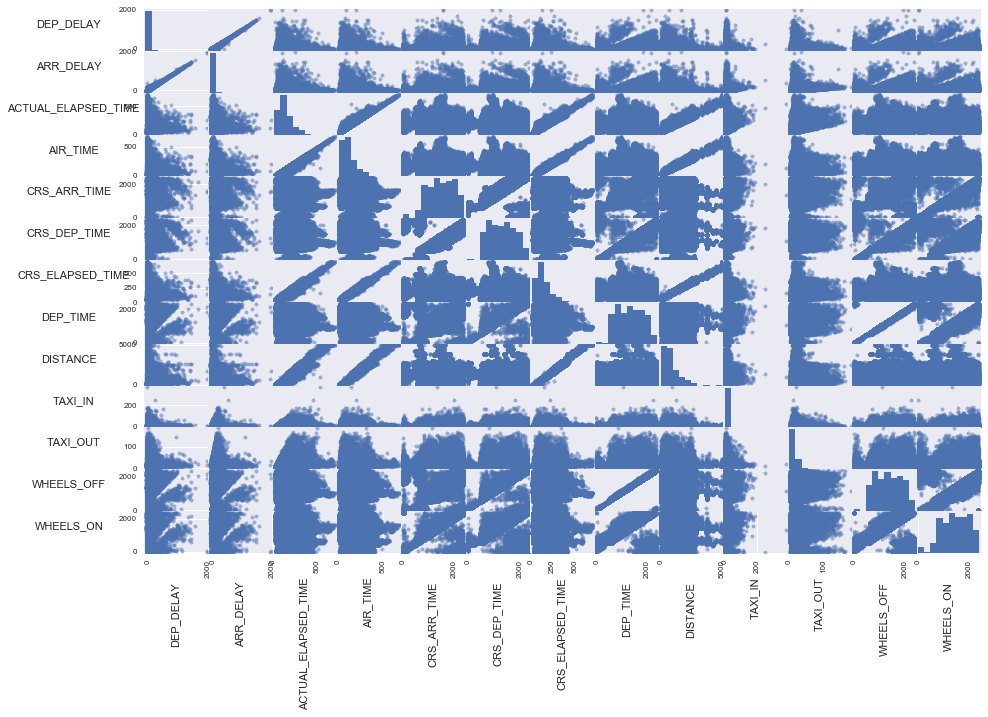

In [32]:
from pandas.tools.plotting import scatter_matrix
df_imputed=df_sampled1[['DEP_DELAY','ARR_DELAY','ACTUAL_ELAPSED_TIME', 'AIR_TIME','CRS_ARR_TIME','CRS_DEP_TIME','CRS_ELAPSED_TIME','DEP_TIME','DISTANCE',
                     'TAXI_IN','TAXI_OUT','WHEELS_OFF','WHEELS_ON']]
ax = scatter_matrix(df_imputed,figsize=(15, 10))
n = len(df_imputed.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        axs = ax[x, y]
        # to make x axis name vertical  
        axs.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        axs.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        axs.yaxis.labelpad = 50


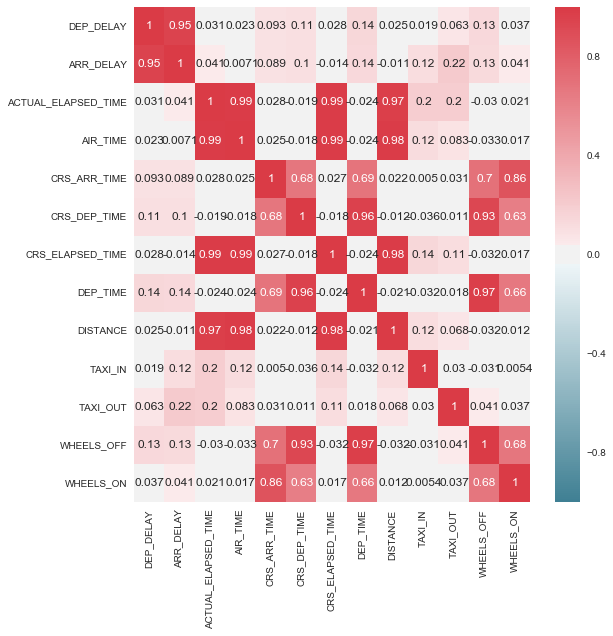

In [33]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_imputed.corr(), cmap=cmap, annot=True)

f.tight_layout()

### Analysis

#### Per the scatter matrix, it appears that departure delays, arrival delays, actual elapsed time, air time, CRS elapsed time, distance, taxi in and taxi out are right skewed.  Also, based on scatter matrix and correlation heat map, there appears to be a strong correlation between multiple variables. 

#### Departure Delay and Arrival Delay are highly correlated with R2=0.95. 
#### Actual elapsed time is highly correlated with Air time and CRS Elapsed time (R2=0.99) and with Distance (R2=0.97)
#### Departure time is highly correlated with Wheels off (R2=0.97), CRS Departure Time (R2=0.96)
#### CRS Arrival time is medium correlated with Wheels On (R2=0.86)

#### Esentially, all departure times and all arrival times are highly correlated with each other, as expected, since generally speaking, the departure time is dictated by when the plane takes off (wheels off), the distance and departure time and when the plane lands (wheels on) dictates the arrival time.

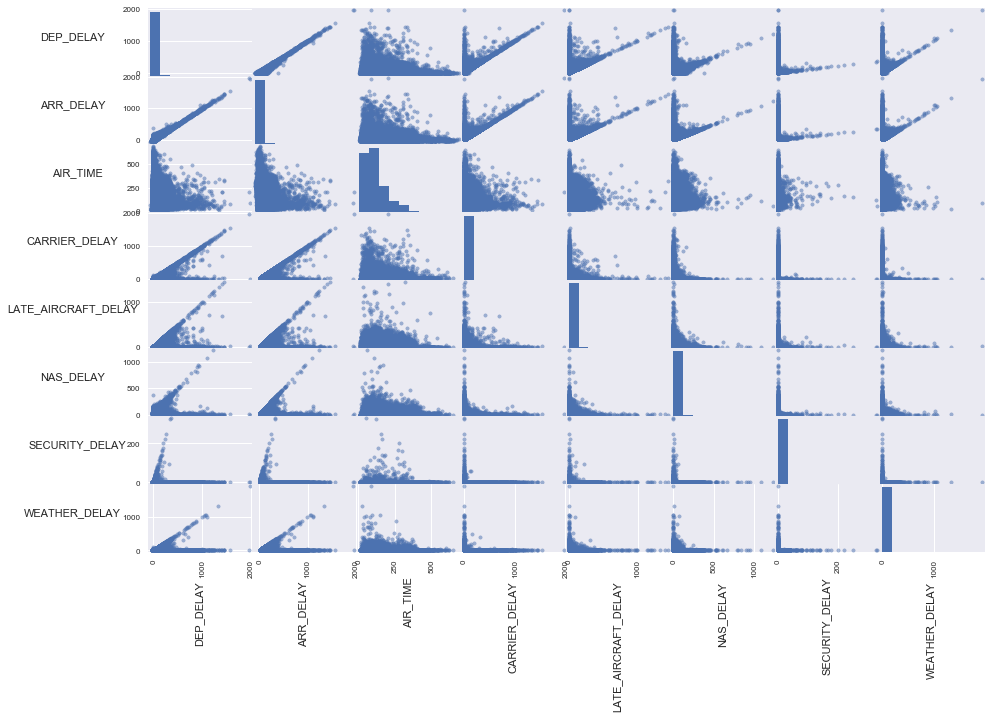

In [39]:
from pandas.tools.plotting import scatter_matrix
df_delays=df_sampled1[['DEP_DELAY','ARR_DELAY','AIR_TIME', 'CARRIER_DELAY','LATE_AIRCRAFT_DELAY','NAS_DELAY','SECURITY_DELAY','WEATHER_DELAY']]
ax = scatter_matrix(df_delays,figsize=(15, 10))
n = len(df_delays.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        axs = ax[x, y]
        # to make x axis name vertical  
        axs.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        axs.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        axs.yaxis.labelpad = 50

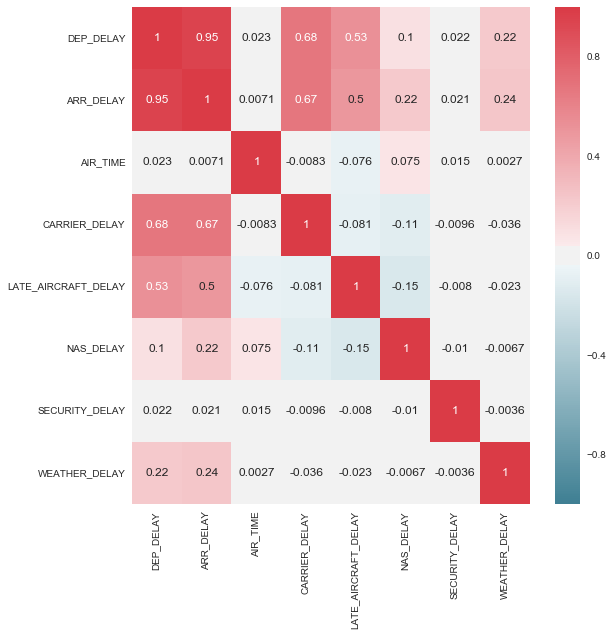

In [40]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_delays.corr(), cmap=cmap, annot=True)

f.tight_layout()

### Analysis 

#### From the scatter plot matrix and correlation heat map of arrival delay and departure delay with different delay types, it appears that both Arrival delay and Departure delay is somewhat correlated with late aircraft delay (0.53) and carrier delay (0.68) only.  Oodly, security delay, weather delay, and nas delay do not effect the departure/arrival delays.  All delay types:  Carrier delay, late aircraft delay, nas delay, security delay, weather delay, all appear to be right skewed.

# Explore Attributes and Class

# New Features

In order to determine airline reliability, we will create a new boolean flag called "Reliablity".  This new variable will be
computed based on departure delay, arrival delay, diverted flag, and cancellation flag.

Furthermore, few of the features that may have been helpful in determing flight reliability include the following:

    1.  The size of the airport hub - It would be interesting to see whether larger airport hubs are easier to travel out of than
        smaller ones and if the quality/performance of flights is effected based on the size.
    2.  The quality of the airline based on the revenue generated by them.  Is an airline that is in a bigger city more reliable 
        than an airline that serves areas where there are only few airline options.

# Exceptional Work